In [2]:
#Kmeans
#Heirarchical
#Dbscan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0], [100,110], [1000, 1200]])
X

array([[   1,    2],
       [   1,    4],
       [   1,    0],
       [  10,    2],
       [  10,    4],
       [  10,    0],
       [ 100,  110],
       [1000, 1200]])

In [3]:
kmeans = KMeans()   #n_clusters=2 means creating 2 clusters or having 2 centroids

In [4]:
kmeans.fit(X)

KMeans()

In [5]:
kmeans.labels_

array([3, 7, 5, 2, 4, 6, 0, 1], dtype=int32)

In [6]:
kmeans.predict([[0, 0], [12, 3]])

array([5, 2], dtype=int32)

In [11]:
X, y=make_blobs(n_samples=1000, centers=3, n_features=2, random_state=10)  #creating data with clusters

In [12]:
X   #2columns coz 2n_features

array([[ 4.56889035, -9.9492391 ],
       [ 2.35388502,  3.51466401],
       [-0.01750156, -6.05038477],
       ...,
       [ 4.89123569,  4.86995972],
       [ 1.09272697,  4.04641343],
       [ 0.97077866, -4.8289551 ]])

In [13]:
y   #0,1,2 are labels

array([0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
       2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
       2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
       2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 2,
       1, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 2,
       1, 0, 2, 0, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2,

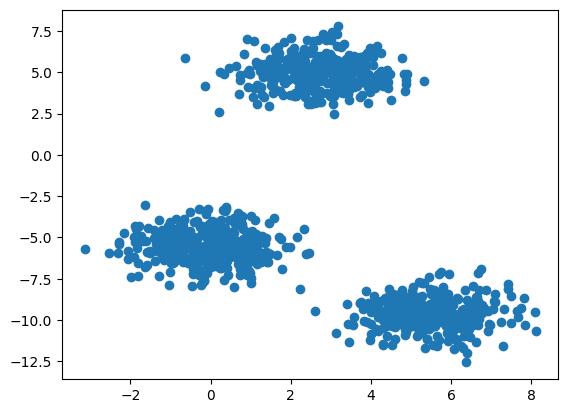

In [14]:
plt.scatter(X[:,0], X[:,1])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=20)

In [19]:
wcss = []   #wcss=within cluster sum of sq
for k in range (2,11):
  kmean = KMeans(n_clusters=k, init="k-means++")
  kmean.fit(X_train)
  wcss.append(kmean.inertia_)

In [20]:
wcss

[6350.4992370301725,
 1230.8405264123755,
 1119.3405564819425,
 959.0212663474725,
 821.434714314201,
 750.7804100954219,
 644.7753831897033,
 529.019768825285,
 504.0934375856828]

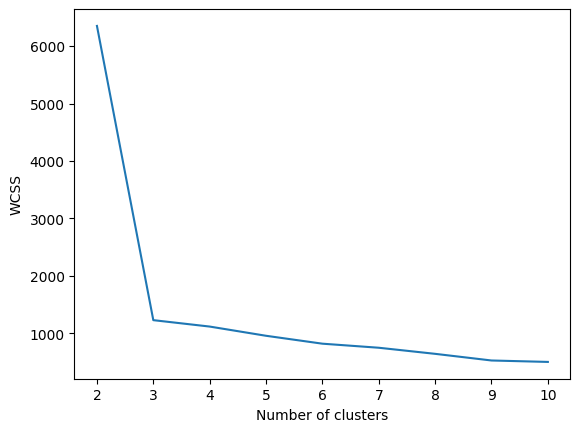

In [21]:
plt.plot(range(2,11), wcss)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
kmean = KMeans(n_clusters=3, init="k-means++")

In [24]:
y_labels = kmeans.fit_predict(X_train)

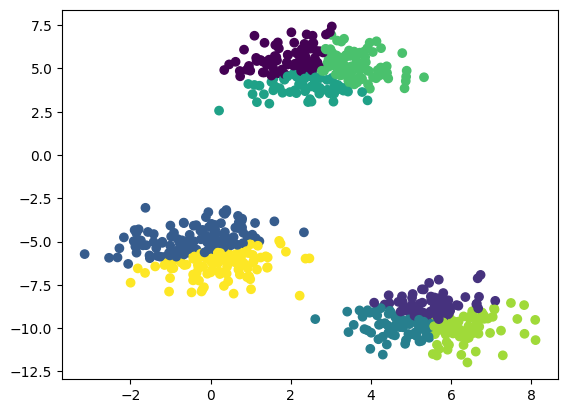

In [25]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_labels)

In [27]:
pip install kneed

In [28]:
from kneed import KneeLocator   #KneeLocator gives out the value of the elbowfrom

In [29]:
k = KneeLocator(range(2,11), wcss, curve="convex", direction="decreasing")

In [30]:
k.elbow   #this tells how many clusters should we create

3

In [31]:
from sklearn.metrics import silhouette_score

In [32]:
from sklearn.cluster import KMeans
silhouette_coeff=[]
for k in range(2,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X_train)
  score = silhouette_score(X_train, kmeans.labels_)
  silhouette_coeff.append(score)


In [33]:
silhouette_coeff

[0.7273220153669463,
 0.7835543034796946,
 0.6314436477146663,
 0.6059370322491238,
 0.4512686260845488,
 0.3196707987015457,
 0.34198389101579263,
 0.3377904261780139,
 0.3393512569278839]

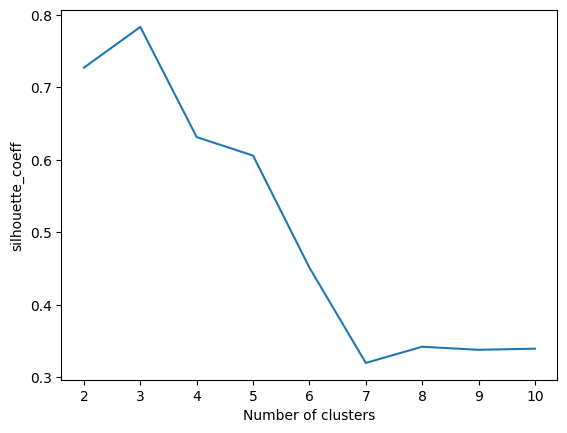

In [34]:
plt.plot(range(2,11), silhouette_coeff)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_coeff")
plt.show()